In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm


pd.set_option('display.max_columns', None)



In [4]:
df = pd.read_csv('datasets/sales_2018-09-23_2024-09-29.csv')
df.head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,b2b,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,company_name,company_location_name,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_margin,gross_profit,gross_sales,net_sales,returns,return_fees,shipping,taxes,total_cost,total_tips,units_per_transaction,average_order_value,duties,additional_fees
0,2018-09-23,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2018-09-24,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2018-09-25,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2018-09-26,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2018-09-27,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [5]:
df.size

738375

In [6]:

fig = px.bar(df.isnull().sum().sort_values(ascending=False), title='Missing Values')
# fig.add_hline(y=df.size)
fig.show()


In [7]:
df.isnull().sum().sort_values(ascending=False)


company_name               13425
company_location_name      13425
marketing_event_target     13423
marketing_event_type       13357
variant_sku                11761
product_type                7353
variant_title               6689
product_title               6227
referrer_host               4695
referrer_url                4695
billing_region              1831
shipping_city               1027
market_name                 1007
sale_kind                   1005
cancelled                   1005
order_name                  1005
referring_channel           1005
financial_status            1005
cost_tracked                1005
billing_country             1005
billing_city                1005
purchase_option             1005
api_client_title            1005
referring_platform          1005
adjustment                  1005
customer_type               1005
product_id                     0
order_id                       0
customer_id                    0
product_price                  0
day       

In [8]:
df[df.marketing_event_type.notna()]


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,b2b,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,company_name,company_location_name,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_margin,gross_profit,gross_sales,net_sales,returns,return_fees,shipping,taxes,total_cost,total_tips,units_per_transaction,average_order_value,duties,additional_fees
3295,2021-01-17,3013748031643,San Diego,4483597172891,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,San Diego,United States,One-time,False,No,No,paid,#2282,order,California,United States,First-time,NaN,NaN,2021-01,2021-01,https://l.facebook.com,l.facebook.com,facebook,meta,facebook_messenger,message,No,0.00,0.00,0,0,0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0
3302,2021-01-17,3013748031643,San Diego,4483597172891,5906123686043,49.0,Tree of Purple Hearts,Mini,37053196927131,NaN,black,Online Store,San Diego,United States,One-time,False,No,No,paid,#2282,order,California,United States,First-time,NaN,NaN,2021-01,2021-01,https://l.facebook.com,l.facebook.com,facebook,meta,facebook_messenger,message,No,49.00,0.00,1,1,1,1,0,0.0,49.0,49.00,0.0,0.0,0.0,0.0,0.0,0.0,1,49.00,0.0,0.0
5602,2021-03-22,3700769947803,North Bay,5033461809307,6129484398747,139.0,Wildflowers,Gift Collection,37806903853211,NaN,Black,Online Store,North Bay,International,One-time,False,No,No,paid,#3210,order,Ontario,Canada,Returning,NaN,NaN,2021-02,2021-01,https://loox.io,loox.io,loox,loox,NaN,message,No,125.10,-13.90,1,1,1,1,0,0.0,139.0,125.10,0.0,0.0,0.0,0.0,0.0,0.0,1,125.10,0.0,0.0
5603,2021-03-22,3700769947803,North Bay,5033461809307,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,North Bay,International,One-time,False,No,No,paid,#3210,order,Ontario,Canada,Returning,NaN,NaN,2021-02,2021-01,https://loox.io,loox.io,loox,loox,NaN,message,No,0.00,0.00,0,0,0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0
5657,2021-03-24,3703873437851,Brooksville,5074241093787,6129484398747,139.0,Wildflowers,Gift Collection,37806903853211,NaN,Black,Online Store,Brooksville,United States,One-time,False,No,No,paid,#3233,order,Florida,United States,Returning,NaN,NaN,2021-03,2021-01,https://loox.io/,loox.io,loox,loox,NaN,message,No,139.00,0.00,1,1,1,1,0,0.0,139.0,139.00,0.0,0.0,0.0,0.0,0.0,0.0,1,139.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,2022-03-15,4718020002022,Reading,6084983357670,6306703239,159.0,Here's to you!,Gift Collection,32493142212746,PCheresB,Black,Online Store,Reading,United States,One-time,False,No,No,paid,5041,order,Pennsylvania,United States,Returning,NaN,NaN,2022-02,2022-01,https://loox.io/,loox.io,loox,loox,NaN,message,No,143.10,-15.90,1,1,1,1,0,0.0,159.0,143.10,0.0,0.0,0.0,0.0,0.0,0.0,1,143.10,0.0,0.0
10280,2022-05-06,4773212717286,Newry,5038649933979,6202345927,159.0,Shalom,Gift Collection,32493286621322,PCshaloB,Black,Online Store,Newry,International,One-time,False,No,No,paid,5131,order,Northern Ireland,United Kingdom,Returning,NaN,NaN,2021-03,2021-01,https://loox.io,loox.io,loox,loox,NaN,message,No,119.25,-39.75,1,1,1,1,0,0.0,159.0,119.25,0.0,0.0,0.0,0.0,0.0,0.0,1,119.25,0.0,0.0
10298,2022-05-06,4773212717286,Newry,5038649933979,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,Newry,International,One-time,False,No,No,paid,5131,order,Northern Ireland,United Kingdom,Returning,NaN,NaN,2021-03,2021-01,https://loox.io,loox.io,loox,loox,NaN,message,No,0.00,0.00,0,0,0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0
11905,2023-12-06,5535767036134,Marco 

In [9]:
df.columns

Index(['day', 'order_id', 'billing_city', 'customer_id', 'product_id',
       'product_price', 'product_title', 'product_type', 'variant_id',
       'variant_sku', 'variant_title', 'api_client_title', 'shipping_city',
       'market_name', 'purchase_option', 'b2b', 'cancelled', 'cost_tracked',
       'financial_status', 'order_name', 'sale_kind', 'billing_region',
       'billing_country', 'customer_type', 'company_name',
       'company_location_name', 'customer_cohort_month',
       'customer_cohort_quarter', 'referrer_url', 'referrer_host',
       'referring_channel', 'referring_platform', 'marketing_event_target',
       'marketing_event_type', 'adjustment', 'total_sales', 'discounts',
       'orders', 'customers', 'net_quantity', 'ordered_item_quantity',
       'gross_margin', 'gross_profit', 'gross_sales', 'net_sales', 'returns',
       'return_fees', 'shipping', 'taxes', 'total_cost', 'total_tips',
       'units_per_transaction', 'average_order_value', 'duties',
       'addition

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13425 entries, 0 to 13424
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      13425 non-null  object 
 1   order_id                 13425 non-null  int64  
 2   billing_city             12420 non-null  object 
 3   customer_id              13425 non-null  int64  
 4   product_id               13425 non-null  int64  
 5   product_price            13425 non-null  float64
 6   product_title            7198 non-null   object 
 7   product_type             6072 non-null   object 
 8   variant_id               13425 non-null  int64  
 9   variant_sku              1664 non-null   object 
 10  variant_title            6736 non-null   object 
 11  api_client_title         12420 non-null  object 
 12  shipping_city            12398 non-null  object 
 13  market_name              12418 non-null  object 
 14  purchase_option       

In [11]:
# converts ids to strings
df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['variant_id'] = df['variant_id'].astype(str)
df['day'] = pd.to_datetime(df['day'])
df.product_type = df.product_type.str.replace('mini', 'Mini')



### Describe

In [12]:
df.describe().round(2)


,day,product_price,company_name,company_location_name,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_margin,gross_profit,gross_sales,net_sales,returns,return_fees,shipping,taxes,total_cost,total_tips,units_per_transaction,average_order_value,duties,additional_fees
count,13425,13425.00,0.0,0.0,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.0,13425.0,13425.00,13425.00,13425.00,13425.0,13425.00,13425.00,13425.0,13425.0,13425.00,13425.00,13425.0,13425.0
mean,2021-10-16 03:00:50.681564416,70.41,NaN,NaN,61.26,-9.83,0.53,0.53,0.55,0.55,0.0,0.0,71.13,60.90,-0.41,0.0,0.27,0.08,0.0,0.0,0.55,61.17,0.0,0.0
min,2018-09-23 00:00:00,0.00,NaN,NaN,-477.00,-9200.00,0.00,0.00,-5.00,0.00,0.0,0.0,0.00,-477.00,-477.00,0.0,-15.00,-11.48,0.0,0.0,0.00,0.00,0.0,0.0
25%,2021-01-19 00:00:00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
50%,2021-05-01 00:00:00,46.55,NaN,NaN,39.20,0.00,1.00,1.00,1.00,1.00,0.0,0.0,44.10,39.20,0.00,0.0,0.00,0.00,0.0,0.0,1.00,39.20,0.0,0.0
75%,2022-03-18 00:00:00,69.00,NaN,NaN,59.00,0.00,1.00,1.00,1.00,1.00,0.0,0.0,69.00,59.00,0.00,0.0,0.00,0.00,0.0,0.0,1.00,59.00,0.0,0.0
max,2024-09-29 00:00:00,22000.00,NaN,NaN,18400.00,0.00,1.00,1.00,11.00,11.00,0.0,0.0,22000.00,18400.00,204.00,0.0,30.00,51.26,0.0,0.0,11.00,18400.00,0.0,0.0
std,NaN,545.23,NaN,NaN,368.04,208.97,0.50,0.50,0.58,0.57,0.0,0.0,545.56,368.07,9.06,0.0,2.09,1.32,0.0,0.0,0.57,367.77,0.0,0.0


In [13]:
df.market_name.value_counts()

market_name
United States    10584
International     1834
Name: count, dtype: int64

In [14]:
df.describe(include='object')


,order_id,billing_city,customer_id,product_id,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment
count,13425,12420,13425,13425,7198,6072,13425,1664,6736,12420,12398,12418,12420,12420,12420,12420,12420,12420,11594,12420,12420,13425,13425,8730,8730,12420,12420,2,68,12420
unique,5132,2190,3731,126,146,6,288,169,47,5,2272,2,1,2,1,5,5131,2,120,58,2,85,31,268,68,40,37,1,1,2
top,0,New York,0,0,Water Yourself,Mini,0,MCwateLB,Black,Online Store,New York,United States,One-time,No,No,paid,#2419,order,California,United States,First-time,2020-12,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,facebook_messenger,message,No
freq,1005,146,1005,6233,608,3635,6233,68,3989,11997,147,10584,12420,12308,12420,12111,12,12263,1481,10670,8939,1359,3528,1589,2536,3825,4709,2,68,12321



### Sales time series

In [15]:
# Extract year, month, and day from the 'day' column
df['year'] = df['day'].dt.year
df['month'] = df['day'].dt.month
df['day_of_month'] = df['day'].dt.day

# Display the first few rows to verify the new columns
print(df[['day', 'year', 'month', 'day_of_month']].head())


         day  year  month  day_of_month
0 2018-09-23  2018      9            23
1 2018-09-24  2018      9            24
2 2018-09-25  2018      9            25
3 2018-09-26  2018      9            26
4 2018-09-27  2018      9            27


In [16]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['orders'], histfunc="sum")
fig.update_layout(
    title="Total Orders Over Time",
    xaxis_title="Day",
    yaxis_title="Total Orders",
    bargap=0.2,
    bargroupgap=0.1
)
fig.show()

In [17]:
fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['gross_sales'], histfunc="sum")
fig.show()

In [18]:
fig = go.Figure()
fig.add_histogram(x=df['day'], y=df['net_sales'], histfunc="sum")
fig.show()

In [19]:
df.groupby('day').size()

day
2018-09-23    1
2018-09-24    1
2018-09-25    1
2018-09-26    1
2018-09-27    1
             ..
2024-09-25    1
2024-09-26    3
2024-09-27    1
2024-09-28    1
2024-09-29    1
Length: 2199, dtype: int64

In [20]:
fig = go.Figure()
fig.add_histogram(x=df['day'])
fig.show()

In [21]:
display([df[col].value_counts().head(20) for col in df.select_dtypes(include='object').columns])


[order_id
 0                1005
 3051017765019      12
 4544012976358      12
 5544995651814      12
 4187308851355      12
 5744189276390      11
 2970398228635      10
 3058132648091      10
 4973181665510       9
 5569894449382       9
 4757845344486       8
 3025251270811       8
 2968459477147       8
 4575115509990       7
 4144918560923       7
 4965205278950       7
 4637999661286       7
 4636102066406       7
 5496357388518       7
 2919216873627       7
 Name: count, dtype: int64,
 billing_city
 New York          146
 Los Angeles        95
 Brooklyn           92
 Rensselaer         85
 Chicago            76
 Houston            71
 Washington         67
 Las Vegas          61
 Dallas             55
 Austin             51
 San Francisco      49
 Philadelphia       49
 Tucson             48
 Jersey City        46
 San Antonio        46
 Virginia Beach     45
 San Jose           44
 Singapore          44
 London             42
 Reading            42
 Name: count, dtype: int64,


In [22]:
df.product_title.value_counts().head(20)


product_title
Water Yourself                                       608
Tree of Purple Hearts                                423
Small Things                                         394
Tree of Life                                         328
Tree of Orange Hearts                                271
Bench                                                252
Hand-written personalization inside your painting    249
Jar                                                  192
Wildflowers                                          175
Red Riding Hood                                      174
Feathers                                             150
Cat                                                  148
Whale                                                144
Kotel                                                139
Dove                                                 135
Sailing                                              110
Flying High With You                                 110
Moonlight Dance  

In [23]:
empty_cols = [col for col in df.columns if (df[col] == 0).all()]
df.loc[:, empty_cols]


,b2b,gross_margin,gross_profit,return_fees,total_cost,total_tips,duties,additional_fees
0,False,0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13420,False,0,0.0,0.0,0.0,0.0,0.0,0.0
13421,False,0,0.0,0.0,0.0,0.0,0.0,0.0
13422,False,0,0.0,0.0,0.0,0.0,0.0,0.0
13423,False,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
na_cols = df.columns[df.isna().all()]
df[na_cols]

,company_name,company_location_name
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
13420,NaN,NaN
13421,NaN,NaN
13422,NaN,NaN
13423,NaN,NaN


In [25]:
df = df[[col for col in df.columns if col not in np.concatenate([empty_cols, na_cols])]]
df.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month
0,2018-09-23,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,23
1,2018-09-24,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,24
2,2018-09-25,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,25
3,2018-09-26,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,26
4,2018-09-27,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,27


In [26]:
df.discounts.value_counts()

discounts
 0.00       11463
-9.80         365
-4.90         166
-20.00        106
-34.75         85
            ...  
-5520.00        1
-29.50          1
-150.00         1
-2790.00        1
-28.90          1
Name: count, Length: 173, dtype: int64

In [27]:
df.columns
# ['day', 'order_id', 'billing_city', 'customer_id', 'product_id',
# 'product_price', 'product_title', 'product_type', 'variant_id',
# 'variant_sku', 'variant_title', 'api_client_title', 'shipping_city',
# 'market_name', 'purchase_option', 'cancelled', 'cost_tracked',
# 'financial_status', 'order_name', 'sale_kind', 'billing_region',
# 'billing_country', 'customer_type', 'customer_cohort_month',
# 'customer_cohort_quarter', 'referrer_url', 'referrer_host',
# 'referring_channel', 'referring_platform', 'marketing_event_target',
# 'marketing_event_type', 'adjustment', 'total_sales', 'discounts',
# 'orders', 'customers', 'net_quantity', 'ordered_item_quantity',
# 'gross_sales', 'net_sales', 'returns', 'shipping', 'taxes',
# 'units_per_transaction', 'average_order_value']

Index(['day', 'order_id', 'billing_city', 'customer_id', 'product_id',
       'product_price', 'product_title', 'product_type', 'variant_id',
       'variant_sku', 'variant_title', 'api_client_title', 'shipping_city',
       'market_name', 'purchase_option', 'cancelled', 'cost_tracked',
       'financial_status', 'order_name', 'sale_kind', 'billing_region',
       'billing_country', 'customer_type', 'customer_cohort_month',
       'customer_cohort_quarter', 'referrer_url', 'referrer_host',
       'referring_channel', 'referring_platform', 'marketing_event_target',
       'marketing_event_type', 'adjustment', 'total_sales', 'discounts',
       'orders', 'customers', 'net_quantity', 'ordered_item_quantity',
       'gross_sales', 'net_sales', 'returns', 'shipping', 'taxes',
       'units_per_transaction', 'average_order_value', 'year', 'month',
       'day_of_month'],
      dtype='object')

### Features

In [28]:
df['unit_price'] = np.abs(df['product_price'] / df['net_quantity'])
df['discount_percentage'] = np.abs(df['discounts'] / df['product_price']) * 100
df['discount_rate'] = np.abs(df['discounts'] / df['gross_sales'])


In [29]:
df.describe().round(2)


,day,product_price,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate
count,13425,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,13425.00,7198.00,7197.00,7131.00
mean,2021-10-16 03:00:50.681564416,70.41,61.26,-9.83,0.53,0.53,0.55,0.55,71.13,60.90,-0.41,0.27,0.08,0.55,61.17,2021.31,6.29,15.40,130.40,5.46,0.05
min,2018-09-23 00:00:00,0.00,-477.00,-9200.00,0.00,0.00,-5.00,0.00,0.00,-477.00,-477.00,-15.00,-11.48,0.00,0.00,2018.00,1.00,1.00,0.00,0.00,0.00
25%,2021-01-19 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,3.00,7.00,49.00,0.00,0.00
50%,2021-05-01 00:00:00,46.55,39.20,0.00,1.00,1.00,1.00,1.00,44.10,39.20,0.00,0.00,0.00,1.00,39.20,2021.00,5.00,15.00,49.00,0.00,0.00
75%,2022-03-18 00:00:00,69.00,59.00,0.00,1.00,1.00,1.00,1.00,69.00,59.00,0.00,0.00,0.00,1.00,59.00,2022.00,11.00,23.00,126.75,5.00,0.05
max,2024-09-29 00:00:00,22000.00,18400.00,0.00,1.00,1.00,11.00,11.00,22000.00,18400.00,204.00,30.00,51.26,11.00,18400.00,2024.00,12.00,31.00,22000.00,200.00,1.00
std,NaN,545.23,368.04,208.97,0.50,0.50,0.58,0.57,545.56,368.07,9.06,2.09,1.32,0.57,367.77,1.27,3.95,9.03,739.31,12.95,0.12


In [30]:
df[df.unit_price > 10000]


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate
9225,2021-12-05,4602783891686,Northbrook,4272995238043,404862107685,22000.0,Nature is a Temple,Grand,4914791514149,NaN,NaN,Online Store,Northbrook,United States,One-time,No,No,paid,4705,order,Illinois,United States,Returning,2020-11,2020-10,NaN,NaN,direct,direct,NaN,NaN,No,13200.0,-8800.0,1,1,1,1,22000.0,13200.0,0.0,0.0,0.0,1,13200.0,2021,12,5,22000.0,40.000000,0.400000
10165,2022-04-06,4742548455654,Rensselaer,5918842519782,1475801612340,18400.0,Soul Train,Grand,13683436060724,NaN,NaN,Online Store,Rensselaer,United States,One-time,No,No,paid,5082,order,New York,United States,Returning,2021-11,2021-10,https://www.jeanpierreweill.com/collections/gr...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,18400.0,0.0,1,1,1,1,18400.0,18400.0,0.0,0.0,0.0,1,18400.0,2022,4,6,18400.0,0.000000,0.000000
10167,2022-04-06,4742548455654,Rensselaer,5918842519782,5048827773066,18400.0,Cafe D'artistes,Grand,33784524472458,NaN,NaN,Online Store,Rensselaer,United States,One-time,No,No,paid,5082,order,New York,United States,Returning,2021-11,2021-10,https://www.jeanpierreweill.com/collections/gr...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,9200.0,-9200.0,1,1,1,1,18400.0,9200.0,0.0,0.0,0.0,1,9200.0,2022,4,6,18400.0,50.000000,0.500000
10566,2022-09-07,4909321945318,Rensselaer,5918842519782,404862107685,22000.0,Nature is a Temple,Grand,4914791514149,NaN,NaN,Online Store,Rensselaer,United States,One-time,No,No,paid,5222,order,New York,United States,Returning,2021-11,2021-10,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,13200.0,-8800.0,1,1,1,1,22000.0,13200.0,0.0,0.0,0.0,1,13200.0,2022,9,7,22000.0,40.000000,0.400000
10568,2022-09-07,4909321945318,Rensselaer,5918842519782,1475905945652,22000.0,Nose to Nose,Grand,13687770415156,NaN,NaN,Online Store,Rensselaer,United States,One-time,No,No,paid,5222,order,New York,United States,Returning,2021-11,2021-10,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,13200.0,-8800.0,1,1,1,1,22000.0,13200.0,0.0,0.0,0.0,1,13200.0,2022,9,7,22000.0,40.000000,0.400000
11793,2023-11-21,5507403022566,Virginia Beach,7604260503782,404862107685,22000.0,Nature is a Temple,Grand,4914791514149,NaN,NaN,Online Store,Virginia Beach,United States,One-time,No,No,paid,5629,order,Virginia,United States,First-time,2023-11,2023-10,https://www.jeanpierreweill.com/cart,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,13200.0,-8800.0,1,1,1,1,22000.0,13200.0,0.0,0.0,0.0,1,13200.0,2023,11,21,22000.0,40.000000,0.400000
12128,2024-01-02,5576217133286,London,7717901172966,8363389190374,18400.0,Western Wall,Grand,44075979538662,NaN,NaN,Online Store,London,International,One-time,No,No,paid,5763,order,England,United Kingdom,First-time,2024-01,2024-01,NaN,NaN,direct,direct,NaN,NaN,No,9500.0,-8900.0,1,1,1,1,18400.0,9500.0,0.0,0.0,0.0,1,9500.0,2024,1,2,18400.0,48.369565,0.483696
12828,2024-05-06,5736172650726,Ogaki,8016174055654,5048827773066,18400.0,Cafe D'artistes,Grand,33784524472458,NaN,NaN,Online Store,Ogaki,International,One-time,No,No,paid,6045,order,Gifu,Japan,First-time,2024-05,2024-04,NaN,NaN,direct,direct,NaN,NaN,No,12880.0,-5520.0,1,1,1,1,18400.0,12880.0,0.0,0.0,0.0,1,12880.0,2024,5,6,18400.0,30.000000,0.300000


In [31]:
df.discount_percentage.value_counts()

discount_percentage
0.000000      5235
20.000000      559
10.000000      482
25.000000      269
5.000000       160
              ... 
143.588679       1
27.063599        1
44.772487        1
20.297700        1
39.914163        1
Name: count, Length: 102, dtype: int64

### Discount

In [32]:
import plotly.express as px

disc = df[df.discount_percentage != 0]
fig = px.histogram(disc, x='discount_percentage', title='Discount Percentage')
fig.show()



In [33]:
df[df.discount_percentage > 90]


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate
3357,2021-01-19,3019227791515,Baltimore,4488542781595,5280920141979,49.0,Bench,Mini,34575525183643,NaN,Black,Online Store,Baltimore,United States,One-time,No,No,paid,#2310,order,Maryland,United States,First-time,2021-01,2021-01,https://search.yahoo.com/,search.yahoo.com,yahoo!,yahoo!,NaN,NaN,No,0.00,-49.00,1,1,1,1,49.0,0.00,0.0,0.0,0.0,1,0.00,2021,1,19,49.0,100.000000,1.000000
4850,2021-03-02,3652625596571,Monroe Township,4305747116187,4826366673034,49.0,Jar,Mini,33258994925706,NaN,Black,Online Store,Monroe Township,United States,One-time,No,No,paid,#2901,order,New Jersey,United States,Returning,2020-11,2020-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,0.00,-49.00,1,1,1,1,49.0,0.00,0.0,0.0,0.0,1,0.00,2021,3,2,49.0,100.000000,1.000000
5178,2021-03-12,3677411541147,Eatonville,5033357541531,4826543030410,49.0,Penguin,Mini,33259484151946,NaN,Black,Online Store,Eatonville,United States,One-time,No,No,paid,#3053,order,Washington,United States,Returning,2021-02,2021-01,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,0.00,-49.00,1,1,1,1,49.0,0.00,0.0,0.0,0.0,1,0.00,2021,3,12,49.0,100.000000,1.000000
5193,2021-03-12,3675591966875,Corner Brook,3671070605467,4826452033674,49.0,Western Wall,Mini,33259238588554,NaN,Wood,Online Store,Corner Brook,International,One-time,No,No,paid,#3034,order,Newfoundland And Labrador,Canada,First-time,2021-03,2021-01,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,0.00,-49.00,1,1,1,1,49.0,0.00,0.0,0.0,0.0,1,0.00,2021,3,12,49.0,100.000000,1.000000
5199,2021-03-12,3675552252059,Northampton,4581694374043,5906079547547,49.0,Tree of Orange Hearts,Mini,37053058285723,NaN,Wood,Online Store,Northampton,International,One-time,No,No,paid,#3032,order,NaN,United Kingdom,Returning,2021-02,2021-01,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,0.00,-49.00,1,1,1,1,49.0,0.00,0.0,0.0,0.0,1,0.00,2021,3,12,49.0,100.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10423,2022-06-26,4828458057958,Dunwoody,6032664658150,4826253754506,69.0,Fiddler,Mini,33258703978634,MCfiddlB,Black,Online Store,Dunwoody,United States,One-time,No,No,paid,5175,order,Georgia,United States,Returning,2022-01,2022-01,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,0.00,-69.00,1,1,1,1,69.0,0.00,0.0,0.0,0.0,1,0.00,2022,6,26,69.0,100.000000,1.000000
11212,2023-04-28,5244381397222,Buffalo,7041760362726,5906079547547,69.0,Tree of Orange Hearts,Mini,37053058220187,MCtoohB,Black,Online Store,Buffalo,United States,One-time,No,No,paid,5437,order,New York,United States,First-time,2023-04,2023-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,0.00,-69.00,1,1,1,1,69.0,0.00,0.0,0.0,0.0,1,0.00,2023,4,28,69.0,100.000000,1.000000
11214,2023-04-28,5244381397222,Buffalo,7041760362726,4796659433610,69.0,Love,Mini,33210380681354,MCahavaB,Black / English,Online Store,Buffalo,United States,One-time,No,No,paid,5437,order,New York,United States,First-time,2023-04,2023-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,0.00,-69.00,1,1,1,1,69.0,0.00,0.0,0.0,0.0,1,0.00,2023,4,28,69.0,100.000000,1.000000
11227,2023-04-30,5249023377638,San Mateo,5201766318235,4816345923722,69.0,Cat,Mini,33233301373066,MCcatB,Black,Online Store,San Mateo,United States,

In [34]:
df[df.discount_percentage.isna()]


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate
0,2018-09-23,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,23,NaN,NaN,NaN
1,2018-09-24,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,24,NaN,NaN,NaN
2,2018-09-25,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,25,NaN,NaN,NaN
3,2018-09-26,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,26,NaN,NaN,NaN
4,2018-09-27,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09,2018-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018,9,27,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13416,2024-09-24,5971556303078,Glebe,6370217033958,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,Glebe,International,One-time,No,No,paid,6264,order,New South Wales,Australia,Returning,2022-07,2022-07,https://www.jeanpierreweill.com/cart,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2024,9,24,NaN,NaN,NaN
13418,2024-09-25,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09,2024-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2024,9,25,NaN,NaN,NaN
13421,2024-09-26,5973918580966,Santiago,8258676523238,0,0.0,NaN,NaN,0,NaN,NaN,Online Store,Santiago,International,One-time,No,No,paid,6265,order,Santiago,Chile,First-time,2024-09,2024-07,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,15.0,0.0,0,0,0,0,0.0,0.0,0.0,15.0,0.0,0,0.0,2024,9,26,NaN,NaN,NaN
13422,2024-09-27,0,NaN,0,0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09,2024-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2024,9,27,NaN,NaN,NaN


In [35]:
df['discount_round'] = df['discount_percentage'].apply(lambda x: round(x / 5) * 5 if pd.notna(x) else x)


In [36]:
fig = px.box(df[df.discount_round != 0], x='discount_round', y='net_sales', title='Boxplot of Discount Round vs Gross Profit')
fig.show()


In [37]:
disc_sum = df.groupby('discount_round')[['net_sales', 'gross_sales', 'orders']].sum()

In [38]:
px.bar(disc_sum['net_sales'], barmode='group', title='Discount Round vs Gross Profit')


### Geography


In [40]:
df.billing_city.nunique()

2190

In [ ]:
px.bar(df.billing_country.value_counts().head(10), title='Top 10 Billing Countries')


In [ ]:
px.bar(df.billing_city.value_counts().head(10), title='Top 10 Billing Cities')


In [ ]:
px.bar(df.groupby('billing_city')['net_sales'].sum().sort_values(ascending=False).head(10), title='Top 10 Cities by Gross Sales')

In [ ]:
px.bar(df.groupby('billing_country')['net_sales'].sum().sort_values(ascending=False).head(10), title='Top 10 Cities by Gross Sales')

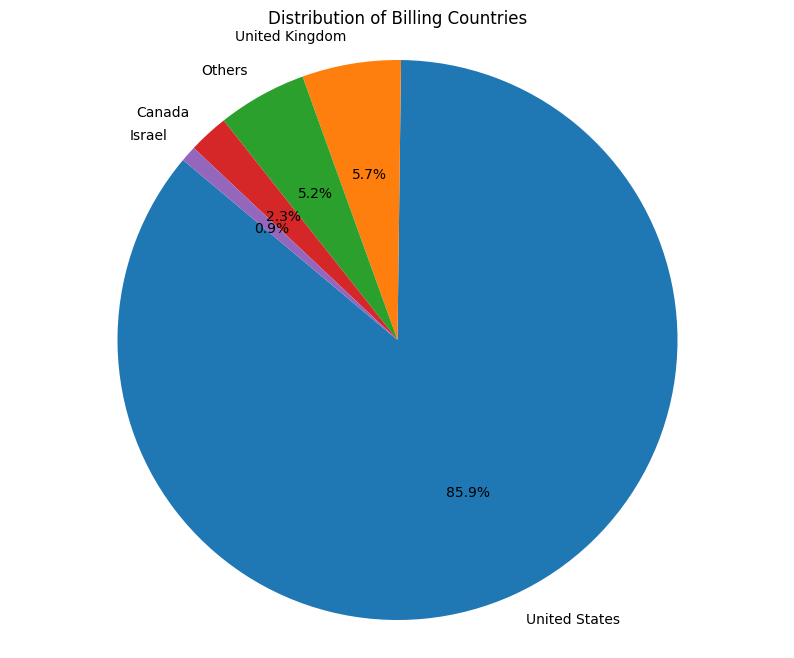

In [ ]:
billing_country_counts = df['billing_country'].value_counts()
top_4_countries = billing_country_counts.head(4)
others_count = billing_country_counts[4:].sum()
top_4_countries['Others'] = others_count
top_4_countries = top_4_countries.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(top_4_countries, labels=top_4_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Billing Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


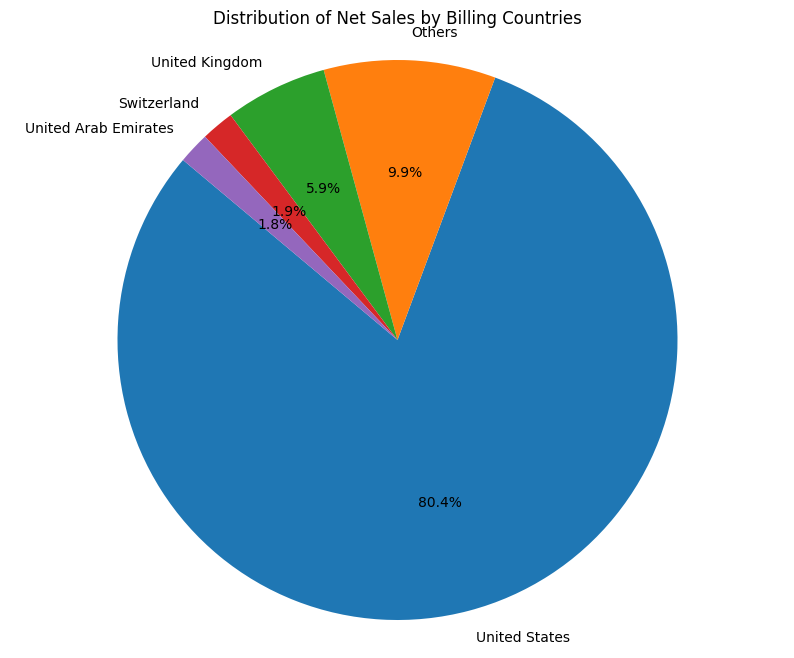

In [ ]:
country_net_sales = df.groupby('billing_country')['net_sales'].sum().sort_values(ascending=False)
top_4_countries = country_net_sales.head(4)
others_net_sales = country_net_sales[4:].sum()
top_4_countries['Others'] = others_net_sales
top_4_countries = top_4_countries.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.pie(top_4_countries, labels=top_4_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Net Sales by Billing Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
avg_country_net_sales = df.groupby('billing_country')['net_sales'].mean().sort_values(ascending=False)
px.bar(avg_country_net_sales.head(10), title='Top 10 Countries by Average Net Sales')


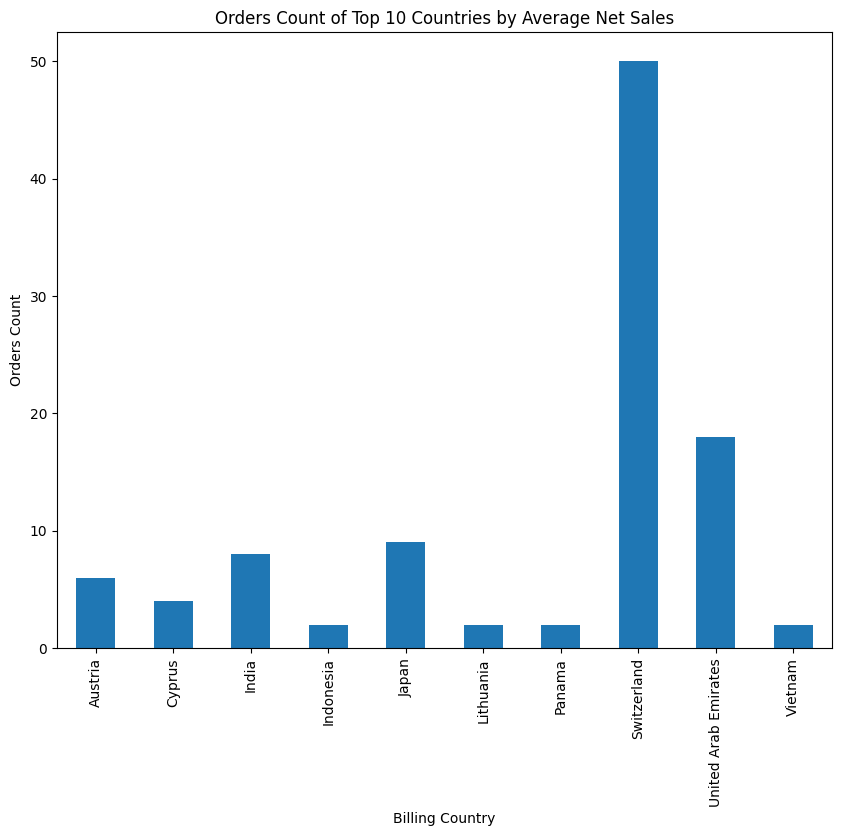

In [ ]:
top_avg_country_orders = df[df['billing_country'].isin(avg_country_net_sales.head(10).index)].groupby('billing_country')['order_id'].count()

plt.figure(figsize=(10, 8))
top_avg_country_orders.plot(kind='bar')
plt.title('Orders Count of Top 10 Countries by Average Net Sales')
plt.xlabel('Billing Country')
plt.ylabel('Orders Count')
plt.show()


### Saving

In [ ]:
df.to_csv('sales_clean.csv', index=False)

In [ ]:
import json

column_dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
with open('column_dtypes.json', 'w') as f:
    json.dump(column_dtypes, f)
    
column_dtypes

{'day': 'datetime64[ns]',
 'order_id': 'object',
 'billing_city': 'object',
 'customer_id': 'object',
 'product_id': 'object',
 'product_price': 'float64',
 'product_title': 'object',
 'product_type': 'object',
 'variant_id': 'object',
 'variant_sku': 'object',
 'variant_title': 'object',
 'api_client_title': 'object',
 'shipping_city': 'object',
 'market_name': 'object',
 'purchase_option': 'object',
 'cancelled': 'object',
 'cost_tracked': 'object',
 'financial_status': 'object',
 'order_name': 'object',
 'sale_kind': 'object',
 'billing_region': 'object',
 'billing_country': 'object',
 'customer_type': 'object',
 'customer_cohort_month': 'object',
 'customer_cohort_quarter': 'object',
 'referrer_url': 'object',
 'referrer_host': 'object',
 'referring_channel': 'object',
 'referring_platform': 'object',
 'marketing_event_target': 'object',
 'marketing_event_type': 'object',
 'adjustment': 'object',
 'total_sales': 'float64',
 'discounts': 'float64',
 'orders': 'int64',
 'customers': 

In [ ]:
avg_city_net_sales = df.groupby('billing_city')['net_sales'].mean().sort_values(ascending=False)
px.bar(avg_city_net_sales.head(10), title='Top 10 Cities by Average Net Sales')



In [ ]:
df.sample(10)

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,unit_price,discount_percentage,discount_rate,discount_round
10099,2022-03-21,4724338393318,Lovettsville,4517559763099,5280925122715,69.00,Boots,Mini,34575547072667,MCbootsB,Black,Online Store,Lovettsville,United States,One-time,No,No,paid,5056,order,Virginia,United States,Returning,2021-01,2021-01,NaN,NaN,direct,direct,NaN,NaN,No,69.00,0.00,1,1,1,1,69.00,69.00,0.0,0.0,0.0,1,69.00,69.00,0.0,0.00,0.0
12073,2023-12-28,5569894449382,Porto Alegre,7708869918950,4816345923722,71.10,Cat,Mini,33233301373066,MCcatB,Black,Online Store,São Paulo,International,One-time,No,No,paid,5744,order,Rio Grande Do Sul,Brazil,First-time,2023-12,2023-10,NaN,NaN,direct,direct,NaN,NaN,No,71.10,0.00,1,1,1,1,71.10,71.10,0.0,0.0,0.0,1,71.10,71.10,0.0,0.00,0.0
10854,2022-11-29,5023173968102,Oklahoma City,6586626703590,0,0.00,NaN,NaN,0,NaN,NaN,Online Store,Oklahoma City,United States,One-time,No,No,paid,5319,order,Oklahoma,United States,First-time,2022-11,2022-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,0.00,0.00,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.00,NaN,NaN,NaN,NaN
9294,2021-12-10,4609082917094,Bradenton,6004948271334,0,0.00,NaN,NaN,0,NaN,NaN,Online Store,Tampa,United States,One-time,No,No,paid,4738,order,Florida,United States,First-time,2021-12,2021-10,NaN,NaN,direct,direct,NaN,NaN,No,0.00,0.00,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.00,NaN,NaN,NaN,NaN
10746,2022-11-08,4985342689510,Madison,6550258876646,7941422907622,126.75,Italian Pastel,Gift Collection,43270753026278,NaN,Black,Online Store,Madison,United States,One-time,No,No,paid,5274,order,Alabama,United States,First-time,2022-11,2022-10,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,126.75,0.00,1,1,1,1,126.75,126.75,0.0,0.0,0.0,1,126.75,126.75,0.0,0.00,0.0
6529,2021-04-26,3789001359515,El Dorado,5187623616667,5480589525147,49.00,Sweet Year,Mini,35426691448987,NaN,Black,Online Store,El Dorado,United States,One-time,No,No,paid,#3623,order,Arkansas,United States,First-time,2021-04,2021-04,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,49.00,0.00,1,1,1,1,49.00,49.00,0.0,0.0,0.0,1,49.00,49.00,0.0,0.00,0.0
2667,2020-12-25,2953737470107,Ossining,4325762728091,6306615303,111.20,Tree of Life,Gift Collection,32493347307658,NaN,Black,Online Store,Ossining,United States,One-time,No,No,paid,#2007,order,New York,United States,Returning,2020-12,2020-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,111.20,0.00,1,1,1,1,111.20,111.20,0.0,0.0,0.0,1,111.20,111.20,0.0,0.00,0.0
873,2020-07-02,2533788319899,Palmdale,3653554536603,4600669896842,139.00,Kotel,NaN,32493256474762,NaN,White Frame,Online Store,Palmdale,United States,One-time,No,No,paid,#1258,order,California,United States,First-time,2020-07,2020-07,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,104.25,-34.75,1,1,1,1,139.00,104.25,0.0,0.0,0.0,1,104.25,139.00,25.0,0.25,25.0
11325,2023-06-12,5308735783142,Mt. Pleasant,7312182378726,6203198151,189.00,Paris Morning,Gift Collection,32493273153674,PCparisB,Black,Online Store,Mt. Pleasant,United States,One-time,No,No,paid,5474,order,Wisconsin,United States,First-time,2023-06,2023-04,NaN,NaN,direct,direct,NaN,NaN,No,189.00,0.00,1,1,1,1,189.00,189.00,0.0,0.0,0.0,1,189.00,189.00,0.0,0.00,0.0
9283,2021-12-09,4608200868070,Brownsburg,5021877043355,5280931414171,49.00,Small Things,Mini,34575590981787,NaN,Black,Online Store,Brownsburg,United States,One-time,No,No,p

### Redunds

In [ ]:
refunds = df[(df.financial_status != 'paid') & (df.sale_kind.notna())]


In [ ]:
refunds.financial_status.value_counts()


financial_status
partially_refunded    198
refunded               87
voided                 21
pending                 3
Name: count, dtype: int64